# About this Notebook

This is a Python notebook. This is the notebook you'll use to run and create the analysis code on pickle data sets. Pickle files are created and premanufactured from ROOT files from MicroBooNE LAr experiment.

You should have access to: example_neutrino.ipynb, neutrino_function.py, data folder. You are free to modify neutrino_function.py or create your own plotting functions.

**IMPORTANT:** It is strongly recommended that only **one** student of a lab pair should edit this notebook and the files contained within the server directories. This is because both students cannot see the same live edit of the notebook or files at the same time, and it is easy to accidently overwrite each other.

Code that is commented out with two hashtags should be uncommented when in use.

# All imports

The basic libraries, you may import more if there are present on the server's environment. If you dont have these packages installed on your local machine, you can use **pip install X** or **pip3 install X** to start using them.

In [1]:
import numpy as np
import uproot3
import pickle

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import ticker

import Neutrino_functions

from math import *
import scipy as sci

# MACHINE LEARNING IMPORTS
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Opening the MC and data frames

In [2]:
# MC
MC_file = './data/MC_EXT_flattened.pkl'

# Data
data_file = './data/data_flattened.pkl'


# Open file as pandas dataframe
MC_EXT = pd.read_pickle(MC_file)
data = pd.read_pickle(data_file)

# removing 'Subevent' from data
MC_EXT = MC_EXT.drop('Subevent', axis = 1)
data = data.drop('Subevent', axis = 1)

print(f'Length of MC data: {len(MC_EXT)}')

Length of MC data: 555624


# You can display the dataframe by uncommenting these lines and running the cell

In [3]:
# Uncomment these lines to display the dataframes
pd.set_option('display.max_columns', 100)
# displays top 10 results.
data.head(10)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v
0,48.170196,230.178085,0.289455,0,0.932121,662.713745,-10.419758,0.564317,1.0,0.981798,443.558472,-71.411057,32.10228,32.137272,-71.675980,443.439148,10000.021584,0.624387,0.672995
1,48.170196,19.862617,20.065849,0,0.932121,467.605438,-41.015533,40.286861,0.460725,0.722245,455.0065,-55.723381,36.461731,32.137272,-71.675980,443.439148,10000.021584,0.145945,0.159
2,177.083498,174.338699,0.057629,0,0.588847,978.765259,9.115969,153.437668,0.999995,0.970214,852.828674,-36.029785,42.856102,42.869896,-35.978130,852.848938,0.629191,0.502137,0.551996
3,0.067737,264.553223,196.515564,0,0.002079,998.799072,18.552534,225.164139,1.0,0.977688,797.282776,63.213791,63.001648,160.463943,-113.297066,772.441833,10000.778217,0.700354,0.627999
4,36.361293,493.096283,0.465464,0,0.983048,865.795166,-56.678547,80.313004,1.0,0.990403,408.639801,96.316406,141.032898,141.039246,96.385994,408.178772,1.296849,1.220361,1.124005
5,127.613429,181.327194,0.272344,0,0.021950,264.979065,92.158607,255.202988,0.999972,0.958479,230.559982,-81.870941,221.46637,221.349503,-81.868439,230.311829,9999.794868,0.517367,0.527997
6,127.613429,10.863928,0.334015,0,0.021950,226.903671,-91.896515,218.480057,0.791141,-0.287616,229.998383,-81.993217,221.4086,221.349503,-81.868439,230.311829,9999.794868,0.114687,0.102
7,101.562292,8.869122,265.905823,0,0.036152,110.97657,81.228905,30.3652,0.011572,0.133134,114.274597,86.827835,36.310745,170.431870,59.736755,340.503021,9999.221455,0.106222,0.101
8,181.173178,168.925873,0.349405,0,0.517549,517.184326,67.922836,156.103348,0.999998,0.959285,406.7724,114.33268,40.269585,40.016575,114.483635,406.585693,9999.828041,0.490352,0.428998
9,162.177990,47.523987,0.030297,0,0.336266,892.599304,-59.251465,37.77512,0.93185,0.761358,870.96521,-33.337875,71.00219,71.004707,-33.363049,870.948181,0.286233,0.220104,0.228


In [4]:
MC_EXT.head(10)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v,weight,true_E,true_L,true_muon_mom
0,124.478148,225.284348,1.286398,21,0.994485,510.146088,-19.997118,191.864334,1.0,0.977081,343.433655,35.865448,54.776821,53.900658,36.203041,342.578735,1.164239,0.613618,0.624997,0.000002,1.371928,438.602722,0.607686
1,124.478148,7.850903,131.947891,21,0.994485,389.239197,46.669083,183.160797,0.041434,0.486446,382.998871,47.109879,178.486572,53.900658,36.203041,342.578735,1.164239,0.101568,0.093,0.000002,1.371928,438.602722,0.607686
2,141.086923,251.017548,0.025229,5,0.007706,766.055969,-50.159794,172.77446,1.0,0.972468,658.480286,117.427391,20.797407,20.804905,117.408989,658.495789,9999.989363,0.670372,0.740995,0.158957,1.798278,440.984772,0.727932
3,10.511966,58.736591,10.511966,4,0.066952,213.629105,117.414757,88.746597,0.929871,0.870984,224.018387,60.914005,78.242538,78.443840,50.530334,223.597870,9999.441230,0.246837,0.234,0.192390,0.777679,438.613037,0.489567
4,10.511966,9.962337,3.888895,4,0.066952,235.423004,46.921162,80.265305,0.372258,0.404711,226.829147,51.903919,80.192444,78.443840,50.530334,223.597870,9999.441230,0.11096,0.131,0.192390,0.777679,438.613037,0.489567
5,147.929810,289.265442,0.152002,5,0.515178,1031.704712,52.0289,83.527153,1.0,0.9848,761.951172,-6.10771,1.388844,1.357146,-6.141214,761.806335,9999.934871,0.755327,0.761996,0.986006,1.214413,431.785278,0.826329
6,96.691013,56.727428,27.846855,21,0.998477,1036.508911,-38.234692,19.931959,0.065278,0.902933,992.340698,-65.519211,22.75659,25.337120,-80.776207,969.163696,10000.275867,0.242116,0.188,0.158957,1.857195,463.048309,1.271057
7,96.691013,67.758522,0.264366,21,0.998477,1036.692261,-78.989571,24.593576,0.966078,0.940751,969.034668,-81.002808,25.39159,25.337120,-80.776207,969.163696,10000.275867,0.267746,0.346999,0.158957,1.857195,463.048309,1.271057
8,96.691013,25.262609,7.398347,21,0.998477,987.487305,-65.503288,5.5114,0.082593,0.79802,972.884705,-76.234444,20.853903,25.337120,-80.776207,969.163696,10000.275867,0.161958,0.099,0.158957,1.857195,463.048309,1.271057
9,106.679589,73.540779,0.226748,5,0.040650,769.010193,110.767021,45.539276,0.950805,0.911611,759.31604,53.225922,1.124355,1.250130,53.412140,759.350220,9999.371950,0.280941,0.384999,0.194167,0.890958,445.648376,0.478177


# Machine learning for Particle Classification

First, look at a sub-sample of our Monte Carlo data.

In [5]:
# Reduce the amount of data for visualisation purposes
MC_EXT_VIS = MC_EXT.sample(int(len(MC_EXT)/10))

# Resetting the index
MC_EXT_VIS.reset_index(drop=True, inplace=True)



# Removing high energy (unphysical) monte carlo results
MC_EXT_VIS.drop(MC_EXT_VIS[MC_EXT_VIS.trk_energy_tot > 2].index, inplace = True)

# Resetting the index again
MC_EXT_VIS.reset_index(drop=True, inplace=True)

# Displaying dataframe
print("Length of new data sample: {}".format(len(MC_EXT_VIS)))
MC_EXT_VIS.head(10)


Length of new data sample: 14345


,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,trk_range_muon_mom_v,trk_mcs_muon_mom_v,weight,true_E,true_L,true_muon_mom
0,103.588061,310.275269,0.284127,21,0.933322,884.469299,-42.602341,86.923409,1.0,0.985227,583.109619,-57.781116,142.537094,142.555420,-57.837555,582.830627,0.809148,0.802306,0.717999,0.000044,0.869951,428.183807,0.793114
1,0.220088,159.548752,29.309044,21,0.001078,865.467407,-123.426361,200.765991,0.99968,0.956097,858.194214,-3.210495,97.464882,76.999672,13.552033,869.497253,1.832274,0.469956,0.472998,0.158957,0.844922,425.887451,0.552475
2,211.504780,52.53149,1.625807,21,0.996972,83.468681,50.180138,50.350616,0.908039,0.910764,32.501804,53.195927,38.205223,37.887421,53.281052,30.910275,1.144626,0.232164,0.314,0.158957,1.499716,430.344238,1.051181
3,15.341442,178.300247,16.671957,21,0.000182,18.650854,6.463153,121.788956,0.999844,0.962299,179.758041,-62.338238,90.679253,88.620781,-79.044579,179.357605,1.989443,0.510768,0.542997,0.135980,1.010870,457.238007,0.482379
4,91.585424,94.860939,0.881732,21,0.999874,704.552734,-63.649677,107.892876,0.998366,0.909667,632.80542,-98.409538,159.092087,159.578537,-98.568939,632.077515,1.232984,0.328696,0.481997,0.158957,5.226265,460.565613,4.290753
5,83.300408,178.362335,1.881992,21,0.994667,890.487488,49.359634,248.60817,0.999757,0.963804,795.13678,-29.340464,121.501823,120.214989,-30.395082,794.308533,1.182580,0.510904,0.474998,0.158957,0.999728,447.236115,0.525512
6,82.982854,111.10836,0.302834,21,0.055905,516.870728,105.394348,165.858673,0.99735,0.962613,606.253357,40.444561,158.95488,158.902512,40.132404,606.255859,0.739906,0.364466,0.311999,0.204481,0.595340,451.573181,0.437022
7,316.175348,8.52408,220.134155,21,0.955305,242.87471,94.705528,223.408997,0.002016,0.544905,236.333694,90.127762,225.984406,244.289139,-24.007641,40.263714,0.848540,0.104673,0.085,0.250867,0.629793,447.791809,0.558973
8,177.426037,53.982777,1.0935,31,0.999872,503.404114,-94.040649,124.286942,0.939065,0.849774,506.579285,-44.824749,132.662323,132.802628,-43.634132,506.426208,1.159498,0.235621,0.172,0.158957,1.703633,442.391113,NaN
9,58.675737,13.472712,0.556688,5,0.999893,46.233849,29.8696,101.096153,0.868744,0.658714,34.961319,28.390495,94.016365,94.087448,28.141846,34.477085,1.722337,0.124709,0.145,0.187852,1.833990,428.337524,1.662083


# Exercise 5 Data Visualisation
Lets visualise some of the variables using *seaborn*

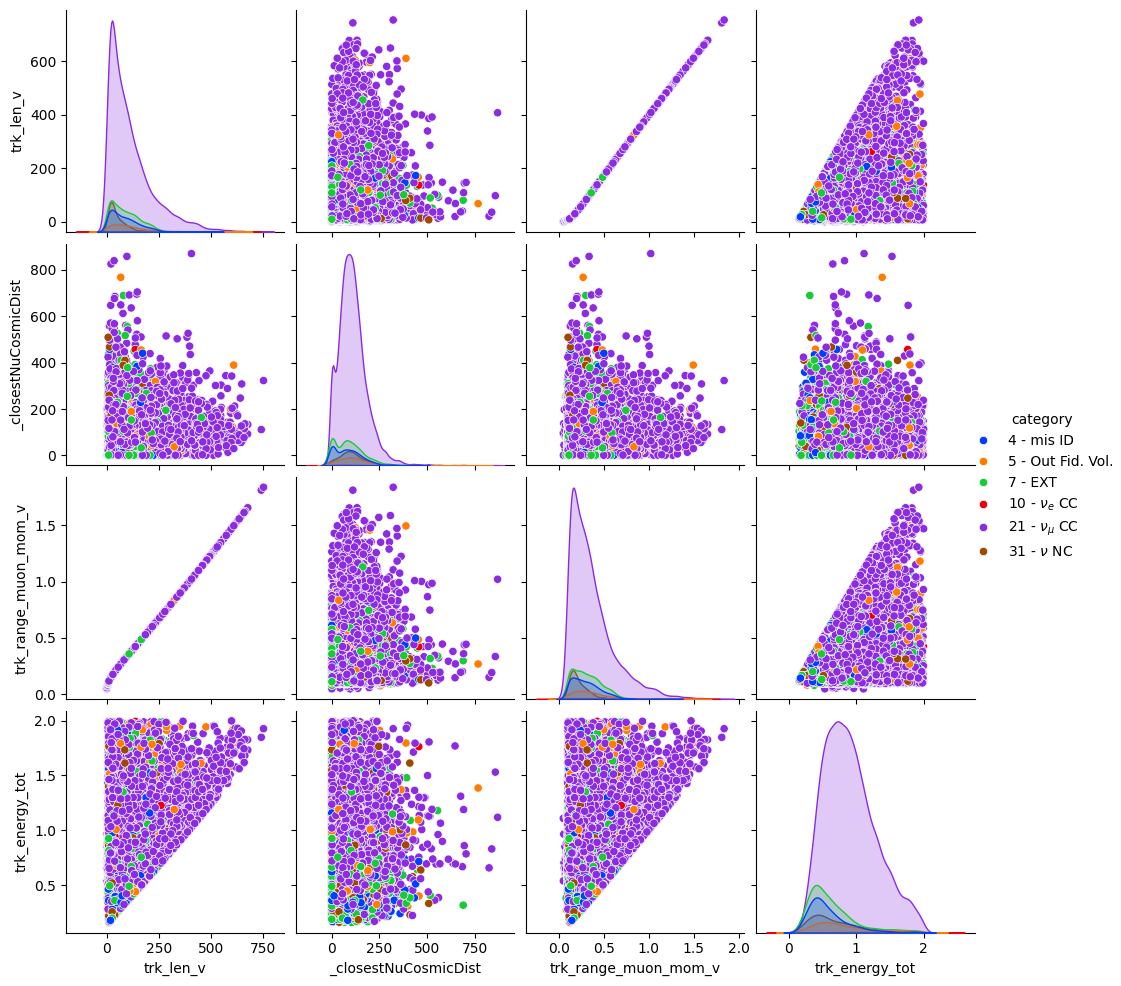

In [6]:
# Visualising a couple of variables.
# variable_list = ['category', 'topological_score', 'trk_distance_v', 'trk_energy_tot', 'reco_nu_vtx_sce_x']
variable_list = ['category', 'trk_len_v', '_closestNuCosmicDist', 'trk_range_muon_mom_v', 'trk_energy_tot']

# List of categories in text
ptype = [r"mis ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu_{\mu}$ CC", r"$\nu$ NC"]

# Plot data
fig = sns.pairplot(MC_EXT_VIS[variable_list], hue = 'category', palette = 'bright')

# Change location of legend
fig._legend.set_bbox_to_anchor((1.05, 0.5))

# Add Category number and type to legend
for t, l in zip(fig._legend.texts, ptype):
   t.set_text(str(t.get_text()) + " - " + str(l))

In [7]:
# Create a deep copy of MC_EXT_VIS without signal events
MC_BG_VIS = MC_EXT_VIS.copy(deep=True)

# Removing high energy (unphysical) monte carlo results
MC_BG_VIS.drop(MC_BG_VIS[MC_BG_VIS.category == 21].index, inplace = True)

# Resetting the index again
MC_BG_VIS.reset_index(drop=True, inplace=True)

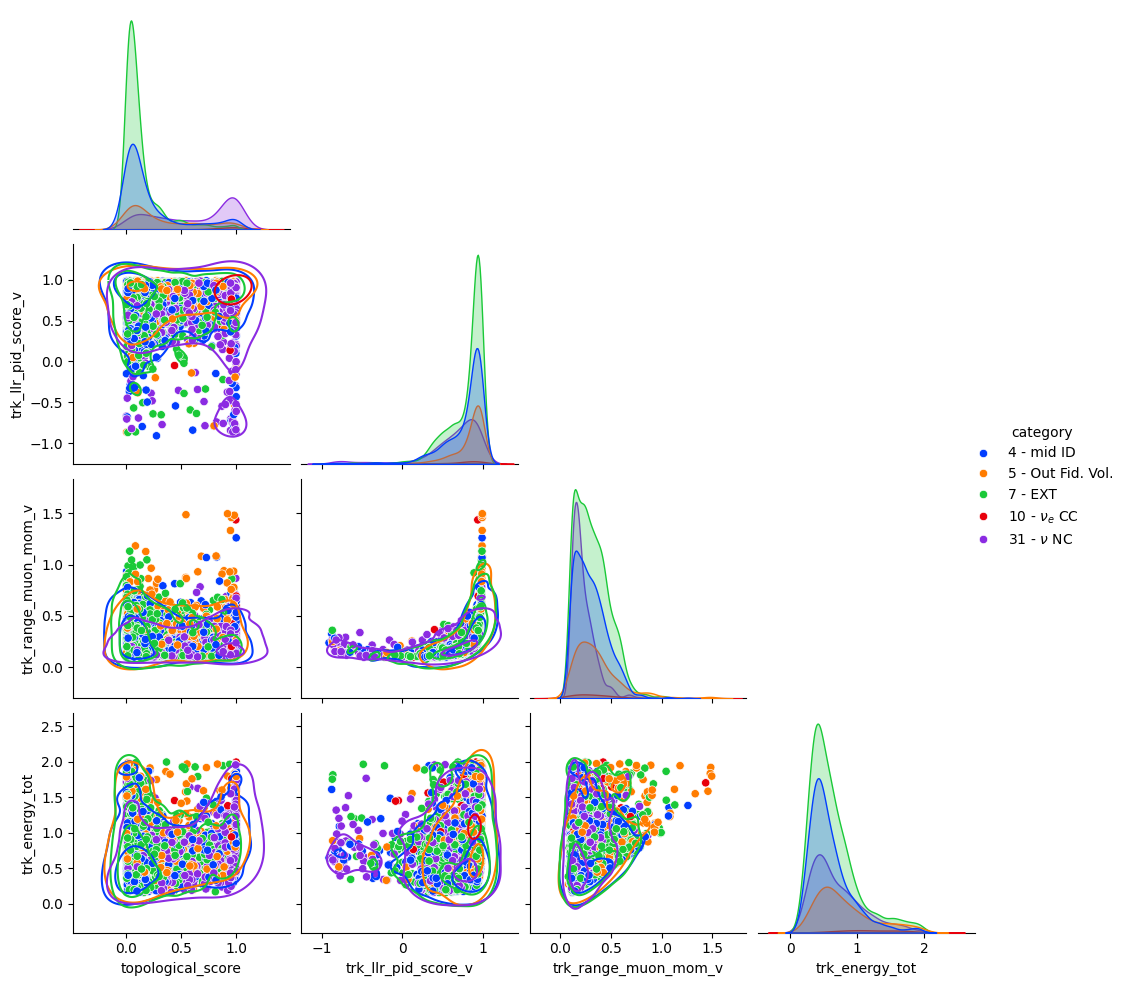

In [8]:
# Plot your background events using sns.pairplot

# List of categories (excluding signal) in text
ptype_no_mu = [r"mid ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu$ NC"]

# Visualising a couple of variables.
# variable_list = ['category', 'topological_score', 'trk_distance_v', 'trk_energy_tot', 'reco_nu_vtx_sce_x']
variable_list = ['category', 'trk_len_v', 'trk_llr_pid_score_v', 'trk_range_muon_mom_v', 'trk_energy_tot']
variable_list = ['category', 'topological_score', 'trk_llr_pid_score_v', 'trk_range_muon_mom_v', 'trk_energy_tot']
# variable_list = ['category', 'trk_len_v', 'trk_llr_pid_score_v', 'trk_range_muon_mom_v', 'trk_energy_tot']

# List of categories in text
# ptype = [r"mis ID", r"Out Fid. Vol.", r"EXT", r"$\nu_e$ CC", r"$\nu_{\mu}$ CC", r"$\nu$ NC"]

# Plot data
fig = sns.pairplot(MC_BG_VIS[variable_list], hue = 'category', palette = 'bright', corner=True)
fig.map_lower(sns.kdeplot, levels=3, color="red")

# new_fig = plt.figure()

# new_fig.scatter(MC_BG_VIS['topological_score'][0], MC_BG_VIS['trk_distance_v'][1])

# Change location of legend
fig._legend.set_bbox_to_anchor((1.05, 0.5))

# Add Category number and type to legend
for t, l in zip(fig._legend.texts, ptype_no_mu):
   t.set_text(str(t.get_text()) + " - " + str(l))


In [9]:
# Make sure to delete dataframe copies if you no longer need them!
del MC_BG_VIS

# Exercise 6: Random Forest applications

Here we shall modify the shape of our data for its usage in a decision tree, then apply the *RandomForest* method from the skikit-learn package.

In [10]:
# Adjust data shape
features = ['_closestNuCosmicDist', 'trk_len_v', 'trk_distance_v', 'topological_score', 'trk_sce_end_z_v', 'trk_sce_end_y_v', 'trk_sce_end_x_v', 'trk_score_v', 'trk_llr_pid_score_v', 'trk_sce_start_z_v', 'trk_sce_start_y_v', 'trk_sce_start_x_v', 'reco_nu_vtx_sce_x', 'reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z', 'trk_energy_tot']
output = ['category']

# Setup new database, NEED MORE VALUES
MC_EXT_ML = MC_EXT.copy(deep = True)
MC_EXT_ML = MC_EXT.sample(int(len(MC_EXT)/10))


# Remove muon neutrino and electron neutrino events.

print(f'Initial length of MC Dataframe: {len(MC_EXT_ML)}')

# Removing high energy (unphysical) monte carlo results
MC_EXT_ML.drop(MC_EXT_ML[MC_EXT_ML.category == 21].index, inplace = True)
MC_EXT_ML.drop(MC_EXT_ML[MC_EXT_ML.category == 10].index, inplace = True)
# MC_BG_VIS.drop(MC_BG_VIS[MC_BG_VIS.category == 21].index, inplace = True)

# Resetting the index again
MC_EXT_ML.reset_index(drop=True, inplace=True)

# Print length of dataframe,, with length N
print("Length of MC dataframe: ", len(MC_EXT_ML))

Initial length of MC Dataframe: 55562
Length of MC dataframe:  31882


In [11]:
# Setting up input parameters for random forest.
X = MC_EXT_ML[features]
y = np.array(MC_EXT_ML['category'])

# Display shape of X and y, should be (N, 16) (N) where is number of samples.
print(f"({np.shape(X)}) ({np.shape(y)}) shape:")
##print()

# Then split the data up into a "training set" and "test set" using train_test_split.
# Keep the random_state=1 in your arguments
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1) # 80/20 training/test split

# Print the shape, should now be 
print(f"\n(x_train) (y_train) shape: {np.shape(x_train)}) ({np.shape(y_train)}")
print(f"\n(x_test) (y_test) shape: {np.shape(x_test)}) ({np.shape(y_test)}")
##print()


((31882, 16)) ((31882,)) shape:

(x_train) (y_train) shape: (25505, 16)) ((25505,)

(x_test) (y_test) shape: (6377, 16)) ((6377,)


Produce your randomforest model and fit it (dont worry, there is no explicit output, but make sure you haven't made your model too big! It shouldn't take any more than a couple of minutes at most to fit).

In [12]:
# Produce randomforest classifier model and fit to training data
# Keep the random_state=1 in your arguments
rf = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=8, random_state=1)

# Fitting takes the input and "truth" data for classification purposes
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=1000, random_state=1)

Test the accuracies of your results:

In [13]:
# Produce predictions for the classification of your training dataset using your model:
y_pred = rf.predict(x_train)

# plot the accuracies of said predictions
print("Accuracy on training dataset:",metrics.accuracy_score(y_train, y_pred))
rf_acc_train = metrics.accuracy_score(y_train, y_pred)
y_pred = rf.predict(x_test)
print("Accuracy on testing dataset:",metrics.accuracy_score(y_test, y_pred))
rf_acc_test = metrics.accuracy_score(y_test, y_pred)

Accuracy on training dataset: 0.6638306214467752
Accuracy on testing dataset: 0.6355653128430296


In [14]:
print(rf.classes_)
print(rf.predict_proba(x_test))

[ 4  5  7 31]
[[0.06699391 0.72651001 0.08513978 0.1213563 ]
 [0.19296055 0.14418555 0.64954887 0.01330504]
 [0.2032983  0.12636745 0.64972114 0.02061312]
 ...
 [0.08849871 0.63608495 0.22210982 0.05330652]
 [0.17048819 0.17297185 0.58958301 0.06695695]
 [0.14192628 0.25570938 0.58088468 0.02147966]]


If your training accuracy is similar to your testing accuracy, this demonstrates that you haven't overfit your data!

#### Confusion matrix and variable importance

Produce a confusion matrix for your model to quantify its ability to predict your different interaction types.

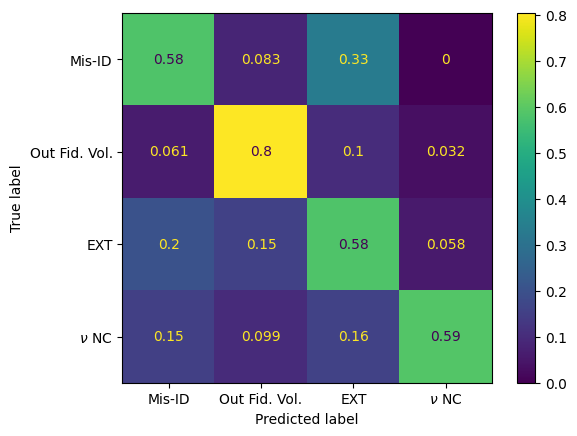

In [15]:
# For labelling your confusion matrix
ptype_no_mu_e = [r"Mis-ID", r"Out Fid. Vol.", r"EXT", r"$\nu$ NC"]

# plot your confusion matrix
cm = confusion_matrix(y_pred, y_test ,normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ptype_no_mu_e)
disp.plot()
plt.show()

Plot the importance of your different parameters.

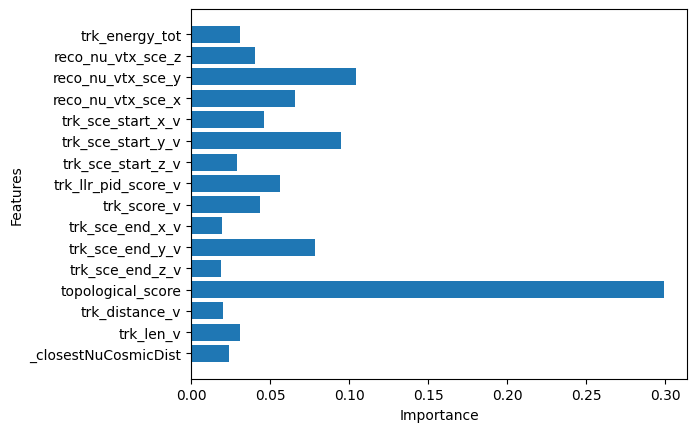

In [16]:
# Plot importance
importance = rf.feature_importances_
ytix = features

plt.barh(range(16), importance)
plt.yticks(range(16), features)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


# Neutrino_functions.py

You are given access to a couple of template functions provided within Neutrino_functions.py, which may be helpful in completing this lab. One such function is 'Neutrino_functions.histogram_plot', which can be seen below, but you can create your own functions if you wish.

In [17]:
#This command shows what input you should give the plotting function. The inputs with =None can be left out when calling the function
help(Neutrino_functions.histogram_plot)

Help on function histogram_plot in module Neutrino_functions:

histogram_plot(MC_frame, variable, bins, name, scaling, xlims=[], plot_fig=True, plot_data=False, logscale=None, dataFrame=None, Stat_func=None)
    MC_frame: pandas dataframe - MC dataframe
    variable: string - name of the variable
    bins: int - number of bins
    name: string - name of the plot. The plot is saved
    scaling: array/list - weights you want to apply on MC data
    plot_data: boolean - if True then plots data as well
    logscale: boolean - if True then y axis is log scale
    dataFrame: pandas dataframe - data dataframe



# Exercise 7: Selection Cuts and Histogram plotting

Modify selection cuts. Remember to cut the same variables in both data sets.

_closestNuCosmicDist
trk_len_v
trk_distance_v
topological_score
trk_sce_end_z_v
trk_sce_end_y_v
trk_sce_end_x_v
trk_score_v
trk_llr_pid_score_v
trk_sce_start_z_v


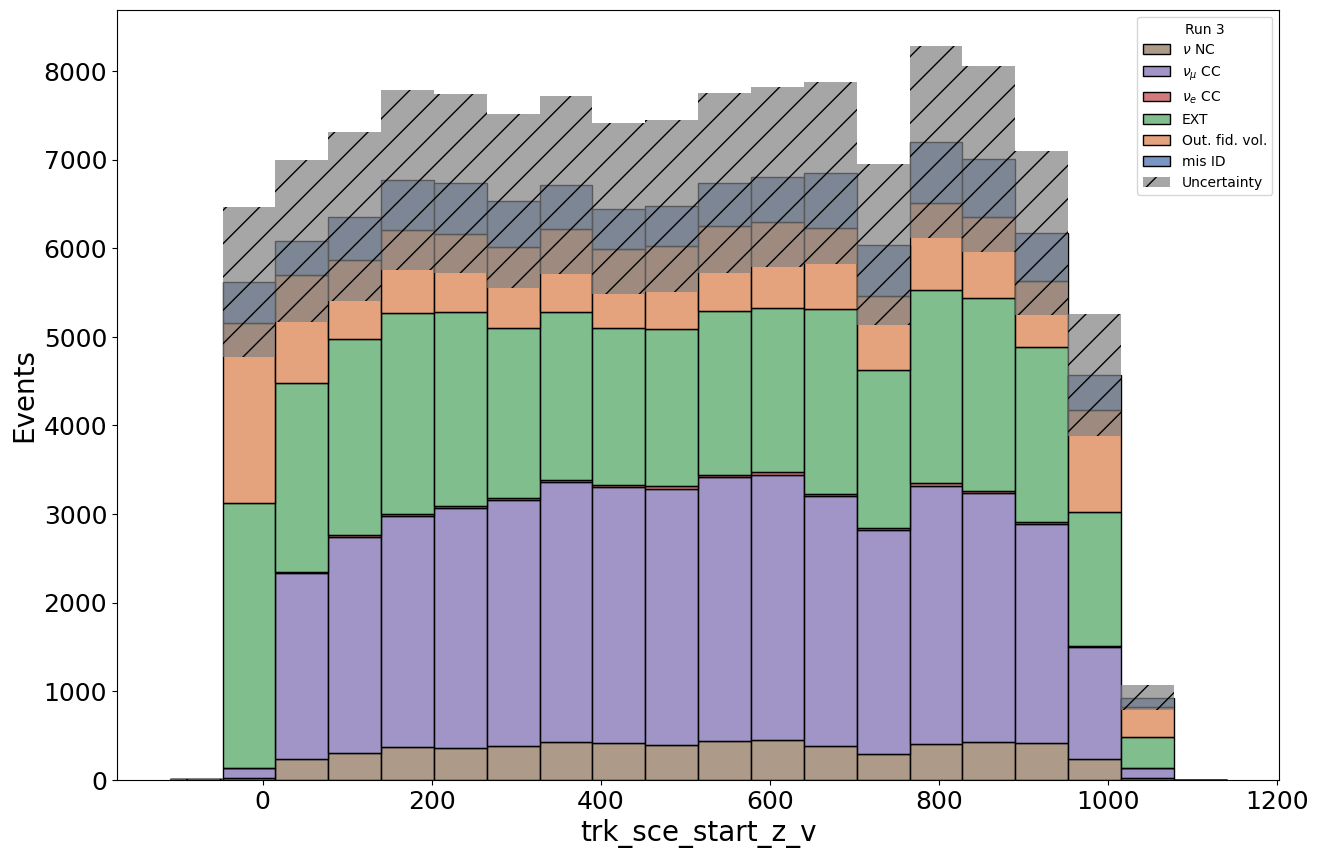

trk_sce_start_y_v


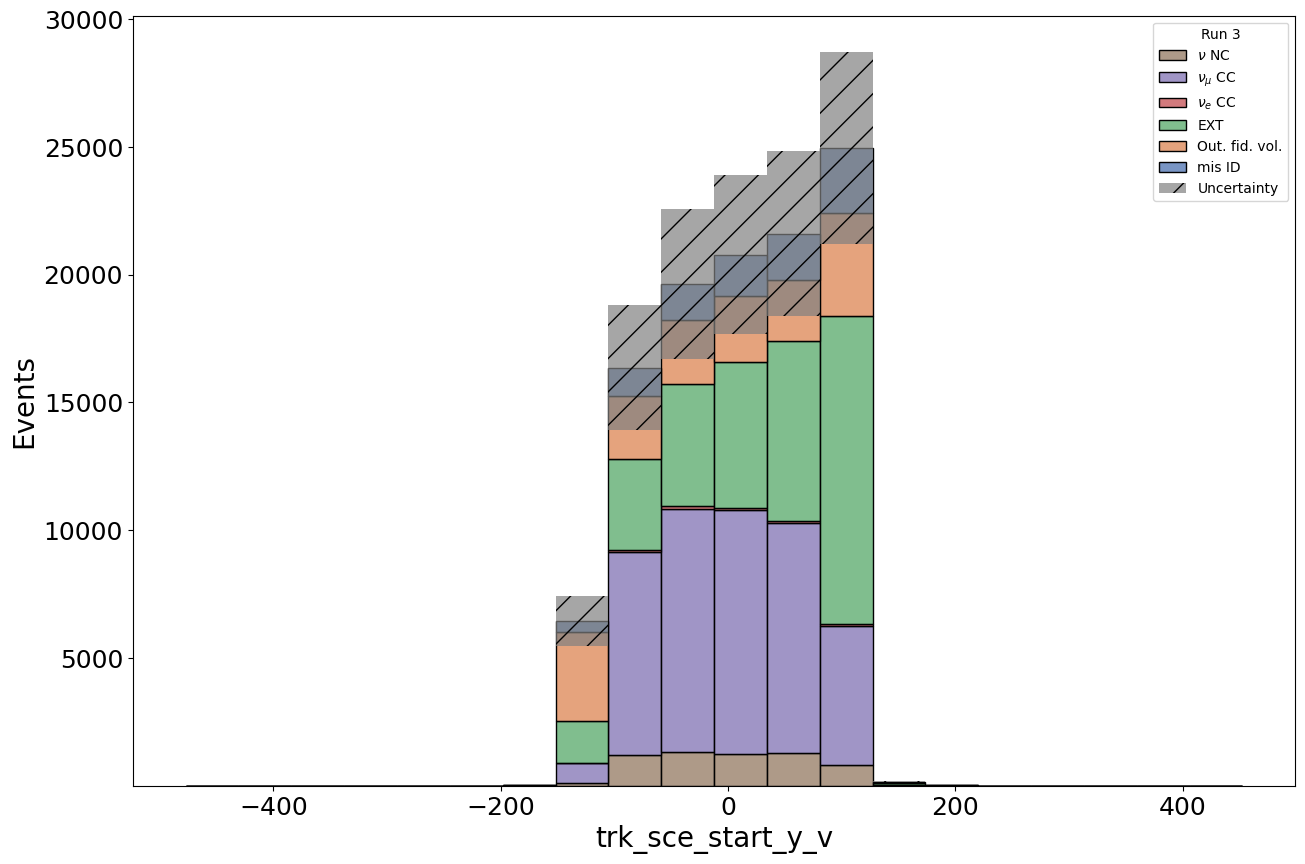

trk_sce_start_x_v


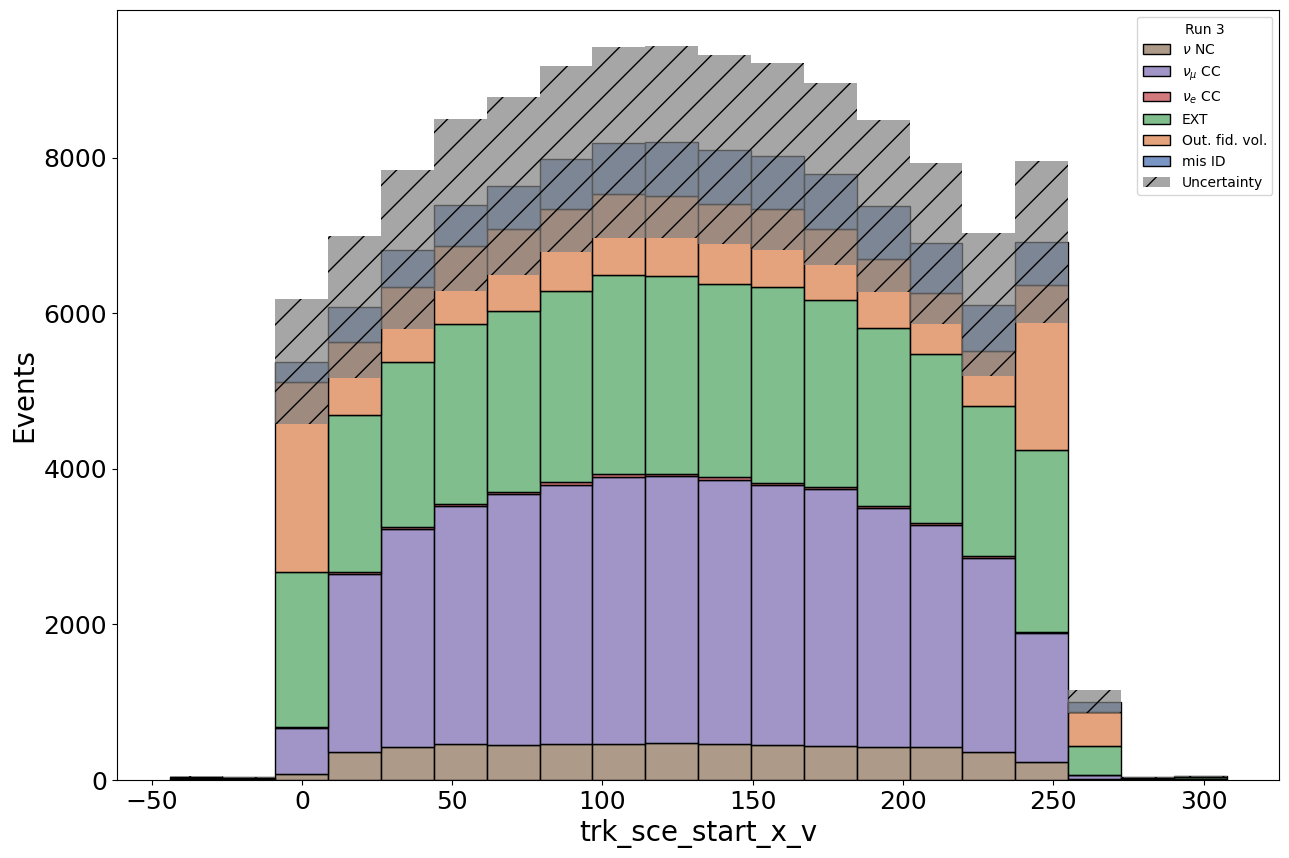

reco_nu_vtx_sce_x
reco_nu_vtx_sce_y
reco_nu_vtx_sce_z
trk_energy_tot


In [18]:
for name in features:
    print(name)
    if 'trk_sce_start' in name.lower():# or "topological" in name.lower() or "trk_score" in name.lower():
        Neutrino_functions.histogram_plot(MC_frame = MC_EXT, variable=name, bins=20, name=name, scaling=MC_EXT['weight'], xlims=[min(MC_EXT[name]), max(MC_EXT[name])], plot_data=False)

In [19]:
def Selections(frame, cuts, return_params = False):
    frame_length_init = len(frame)
    # Iterate through lims in "cuts" dictionary
    for name, lims in cuts.items():
        frame_length_init_cut = len(frame)
        signal_len_init_cut = len(frame[frame.category == 21])
    
        # Basic variables present in dataframe 
        # trk_start_x_v = frame['trk_sce_start_x_v']        # cm
        # trk_start_y_v = frame['trk_sce_start_y_v']        # cm
        # trk_start_z_v = frame['trk_sce_start_z_v']        # cm
        # trk_end_x_v = frame['trk_sce_end_x_v']            # cm
        # trk_end_y_v = frame['trk_sce_end_y_v']            # cm
        # trk_end_z_v = frame['trk_sce_end_z_v']            # cm
        # reco_x = frame['reco_nu_vtx_sce_x']               # cm
        # reco_y = frame['reco_nu_vtx_sce_y']               # cm
        # reco_z = frame['reco_nu_vtx_sce_z']               # cm
        # topological = frame['topological_score']          # N/A
        # trk_score_v = frame['trk_score_v']                # N/A
        # trk_dis_v = frame['trk_distance_v']               # cm
        # trk_len_v = frame['trk_len_v']                    # cm
        # trk_energy_tot = frame['trk_energy_tot']          # GeV 
        
        
        
        # select the conditions you want to apply, here is an initial condition to get you started.
        if lims[0] != None:
            selection = (frame[name] > lims[0])
            frame = frame[selection]
        if lims[1] != None:
            selection = (frame[name] < lims[1])
            frame = frame[selection]
        
        # Apply selection on dataframe
        len_signal = len(frame[frame.category == 21])
        purity = len_signal/len(frame)
        if not return_params:
            print(f'Cut: {name} - {lims}\nEfficiency: {len(frame)/frame_length_init_cut}\nPurity initial: {signal_len_init_cut/frame_length_init_cut}\nPurity: {purity}\n')
    efficiency = len(frame)/frame_length_init
    if not return_params:
        print(f'Total efficiency: - {efficiency}')
        print('\n\n\n')
    
    if return_params:
        return frame, {"efficiency": efficiency, "purity": purity}
    return frame

## Calls the selection function on the dataframes

In [20]:
MC_EXT_CUT = MC_EXT.copy(deep=True)
MC_EXT_CUT = Selections(MC_EXT_CUT, {"trk_energy_tot": [None, 2], "topological_score": [0.4, None]})
data_frame = Selections(data, {"trk_energy_tot": [None, 2], "topological_score": [0.4, None]})

Cut: trk_energy_tot - [None, 2]
Efficiency: 0.2595478237081192
Purity initial: 0.4214720746404043
Purity: 0.7286961466184965

Cut: topological_score - [0.4, None]
Efficiency: 0.607360048817358
Purity initial: 0.7286961466184965
Purity: 0.8830775905375166

Total efficiency: - 0.15763897887780226




Cut: trk_energy_tot - [None, 2]
Efficiency: 0.24012669834125197
Purity initial: 0.0
Purity: 0.0

Cut: topological_score - [0.4, None]
Efficiency: 0.5595320744237712
Purity initial: 0.0
Purity: 0.0

Total efficiency: - 0.13435858964741185






[0.8830775905375166, 0.8834989924604343, 0.8835172002743947, 0.8835808867149461, 0.8835516414915556, 0.8835020501594568, 0.8835691571284529, 0.8836190686870922, 0.8833955429909225, 0.883391797383458, 0.8834356504392105, 0.8835229462879547, 0.8836075496615858, 0.8836122020175352, 0.8836301241791964, 0.8836296467328562, 0.8836616250439676, 0.8836680185972895, 0.8836769683914363, 0.883697419893631, 0.8837165866467441, 0.8837293609728768, 0.8837002372791986, 0.8837130115770743, 0.8837130115770743, 0.8837257830690155, 0.8837257830690155, 0.8837296139695788, 0.8837296139695788, 0.8837296139695788]


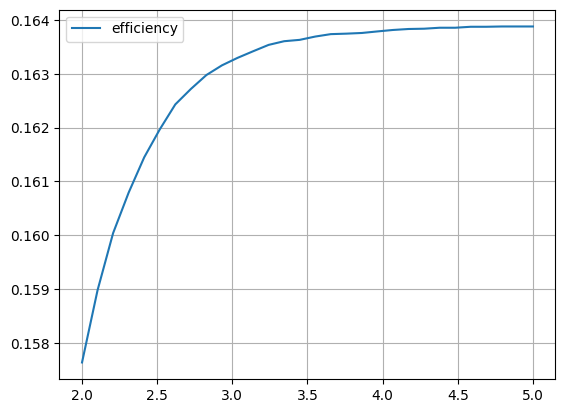

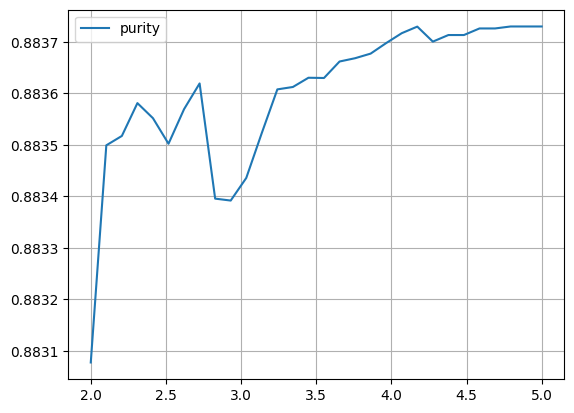

In [21]:
# Run sweep to compare efficiency and purity gains for various cuts

sweep_params = np.linspace(2, 5, 30)
efficiency = []
purity = []
for lim in sweep_params:
    _, eff_pur_dict = Selections(MC_EXT, {"trk_energy_tot": [None, lim], "topological_score": [0.4, None]}, return_params=True)
    efficiency.append(eff_pur_dict['efficiency'])
    purity.append(eff_pur_dict['purity'])
print(purity)
plt.figure()
plt.plot(sweep_params, efficiency, label='efficiency')
plt.legend()
plt.grid()
plt.show()
plt.figure()
plt.plot(sweep_params, purity, label='purity')
plt.legend()
plt.grid()
plt.show()

# Plot all variables and decide on selection cuts
Here is the section with the example histogram plots for each variable. Create a new cell and implement your own function to plot all the histograms.

In [22]:
# Common variables in both dataframes
all_variables_to_plot = list(set(list(MC_EXT_CUT)).intersection(list(data_frame)))
print(all_variables_to_plot)


['trk_sce_start_z_v', 'trk_sce_end_x_v', 'trk_llr_pid_score_v', 'reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z', 'trk_len_v', 'trk_sce_start_y_v', 'topological_score', 'category', 'trk_sce_start_x_v', 'trk_sce_end_y_v', 'reco_nu_vtx_sce_x', 'trk_energy_tot', 'trk_range_muon_mom_v', 'trk_distance_v', 'trk_score_v', '_closestNuCosmicDist', 'trk_mcs_muon_mom_v', 'trk_sce_end_z_v']


trk_sce_start_z_v
trk_sce_end_x_v
trk_llr_pid_score_v
reco_nu_vtx_sce_y
reco_nu_vtx_sce_z
trk_len_v
trk_sce_start_y_v
topological_score
category
trk_sce_start_x_v
trk_sce_end_y_v
reco_nu_vtx_sce_x
trk_energy_tot


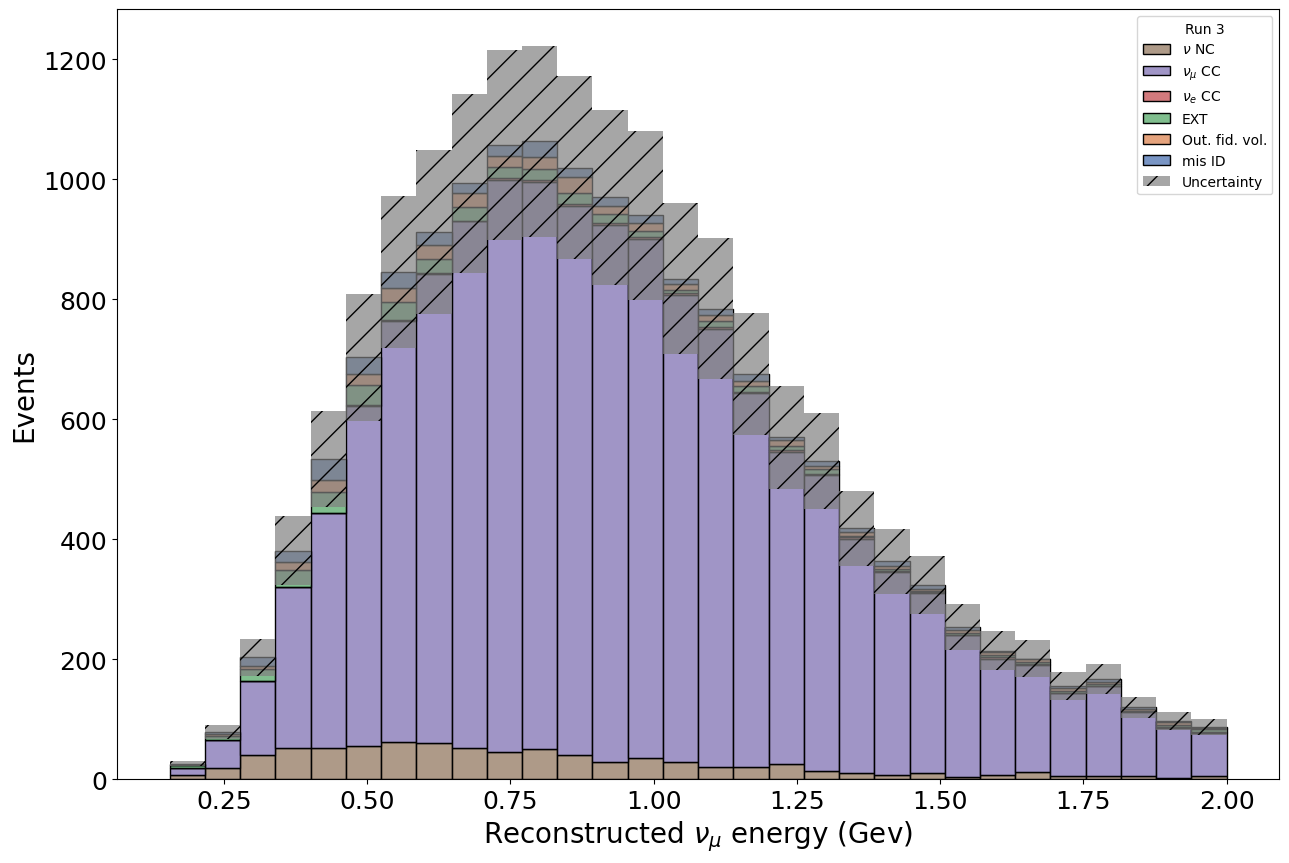

trk_range_muon_mom_v
trk_distance_v
trk_score_v
_closestNuCosmicDist
trk_mcs_muon_mom_v
trk_sce_end_z_v


In [23]:
# Plot any chosen variables after cuts have been made

for name in all_variables_to_plot:
    print(name)
    # print(type(MC_EXT))
    if 'energy' in name.lower():
        Neutrino_functions.histogram_plot(MC_frame = MC_EXT_CUT, variable=name, bins=30, name=name, scaling=MC_EXT_CUT['weight'], xlims=[min(MC_EXT_CUT[name]), max(MC_EXT_CUT[name])], plot_data=False)

# Exercise 8: Check the purity and efficiency of the sample
It is recommended to plot purity and efficiency after each variable cut.

**HINT:** Function Selection() has commented lines of code that you may find useful for purpose of plotting changes in purity/efficiency after every cut.

In [24]:
# Done in earlier cell

# Exercise 9: Plot the energy spectrums here and normalise

Final representation of MC and data after applying the cuts.

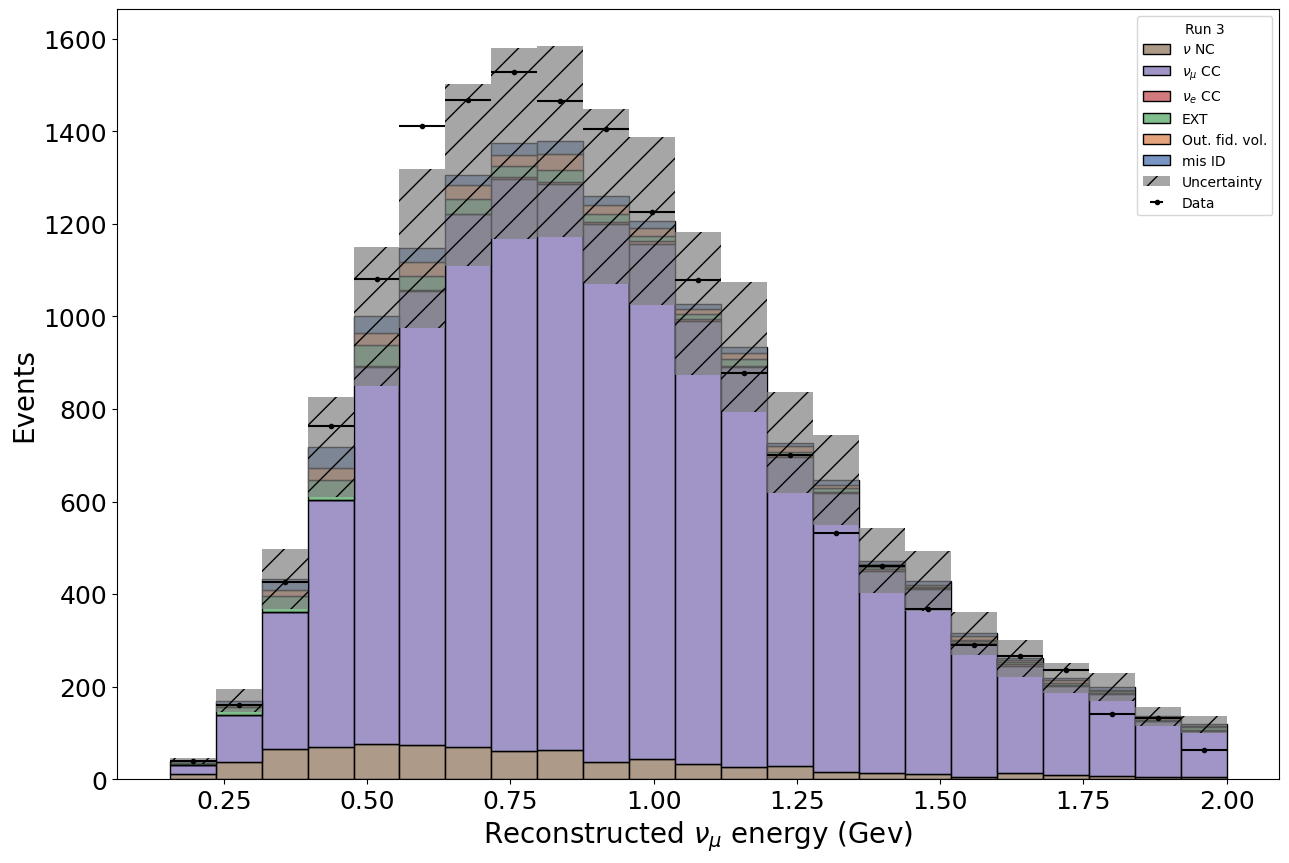

In [25]:
MC_heights, data_frame_heights, err = Neutrino_functions.histogram_plot(MC_frame = MC_EXT_CUT,
                                  variable='trk_energy_tot',
                                  bins=23, name=name,
                                  scaling=MC_EXT_CUT['weight'],
                                  xlims=[min(MC_EXT_CUT['trk_energy_tot']), max(MC_EXT_CUT['trk_energy_tot'])],
                                  plot_data=True,
                                  dataFrame=data_frame)

# Exercise 10: Oscillation and fitting

### a) Define functions requires for Oscillation analysis, test that they work!


C:\Users\fredr\AppData\Local\Temp\ipykernel_264012\2839428217.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.cos(theta)**4 + np.sin(theta)**4 + 2*(np.cos(theta)**2)*(np.sin(theta)**2)*np.cos(2.54 * dm21**2*L/(E))
C:\Users\fredr\AppData\Local\Temp\ipykernel_264012\2839428217.py:3: RuntimeWarning: invalid value encountered in cos
  return np.cos(theta)**4 + np.sin(theta)**4 + 2*(np.cos(theta)**2)*(np.sin(theta)**2)*np.cos(2.54 * dm21**2*L/(E))
C:\Users\fredr\AppData\Local\Temp\ipykernel_264012\2839428217.py:7: RuntimeWarning: divide by zero encountered in divide
  return np.sin(2*theta)**2 * np.sin(1.27 * dm21**2*L/E) ** 2
C:\Users\fredr\AppData\Local\Temp\ipykernel_264012\2839428217.py:7: RuntimeWarning: invalid value encountered in sin
  return np.sin(2*theta)**2 * np.sin(1.27 * dm21**2*L/E) ** 2


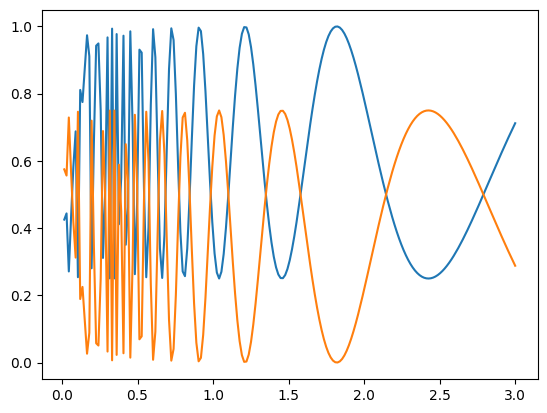

In [26]:
# oscillation function
def P_no_oscillation(theta, dm21, L, E):
    return np.cos(theta)**4 + np.sin(theta)**4 + 2*(np.cos(theta)**2)*(np.sin(theta)**2)*np.cos(2.54 * dm21**2*L/(E))
def P_oscillation(theta, dm21, L, E, sin2theta = None):
    if sin2theta != None:
        return sin2theta * np.sin(1.27 * dm21*L/E) ** 2
    return np.sin(2*theta)**2 * np.sin(1.27 * dm21**2*L/E) ** 2

E_vals = np.linspace(0, 3, 200)
L =100
dm21 = 0.3
theta = np.pi/6

# Plot to show expected oscillation functions and to compare calculated value vs 1-P

plt.plot(E_vals, P_no_oscillation(theta, dm21, L, E_vals))
# plt.plot(E_vals, [P_oscillation(theta, dm21, L, E) for E in E_vals])
plt.plot(E_vals, P_oscillation(theta, dm21, L, E_vals))
plt.show()

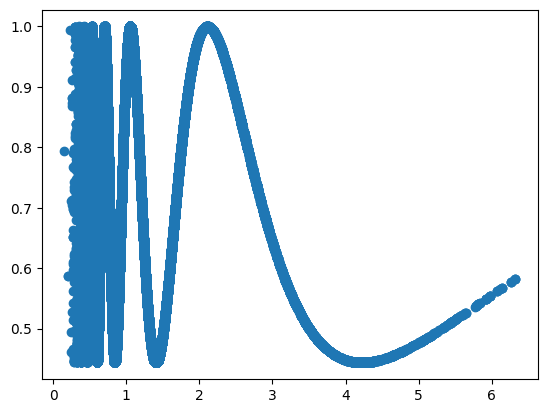

In [27]:
# muon disappearance application to reconstructed neutrino energy

E_vals = np.array([E for E in MC_EXT_CUT['true_E']])
L =0.47
dm21 = 11.112
theta = np.pi/6
sin2theta = 0.556
probabilities = 1 - P_oscillation(0, dm21, L, E_vals, sin2theta=sin2theta)
plt.scatter(E_vals, probabilities)
plt.show()

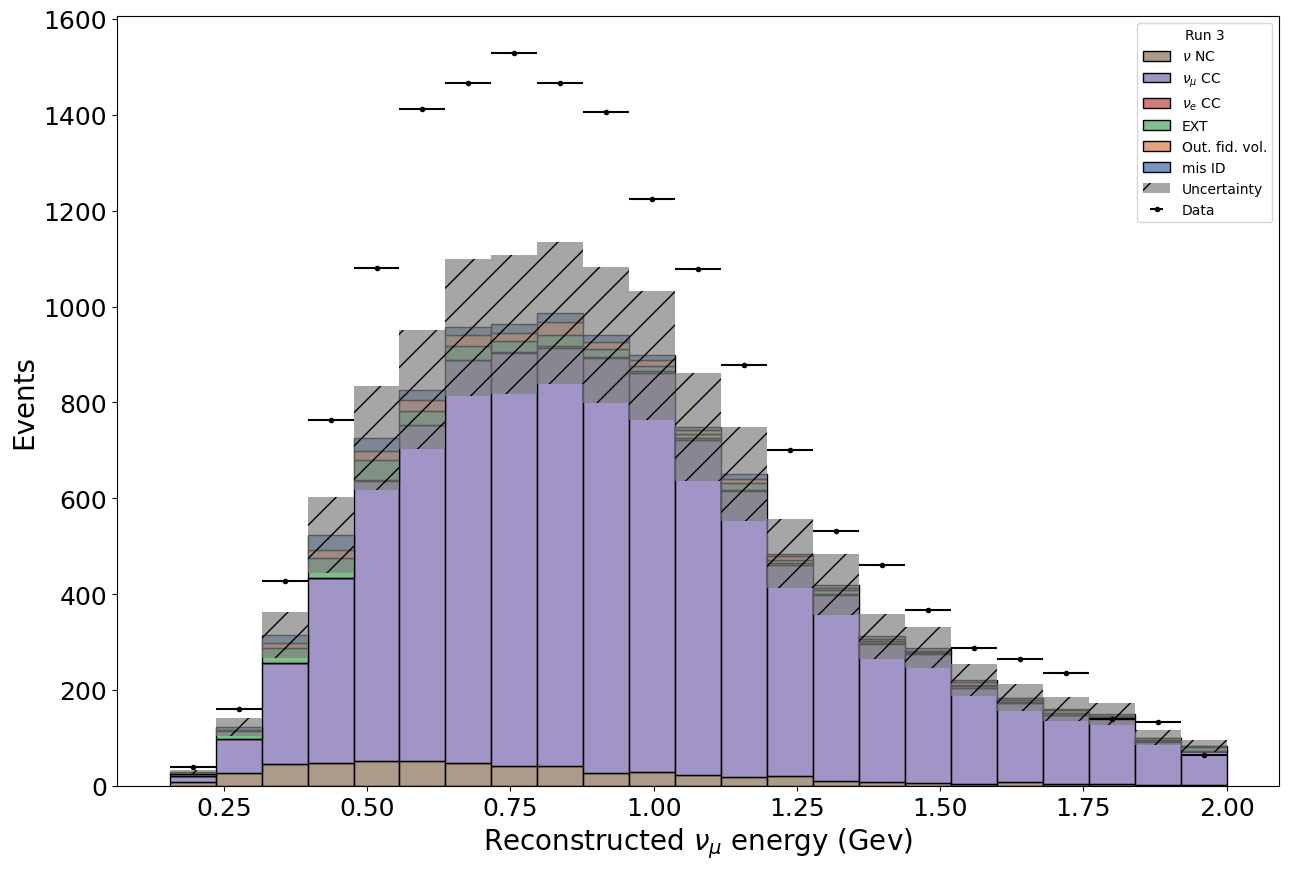

([np.float64(28.79343520265155),
  np.float64(123.85297172903117),
  np.float64(315.17590989653473),
  np.float64(523.7256024230419),
  np.float64(725.1824939082873),
  np.float64(826.790307052451),
  np.float64(956.3918273152146),
  np.float64(962.6243785446547),
  np.float64(986.6001146729575),
  np.float64(940.3420304300137),
  np.float64(898.5841618701882),
  np.float64(749.3612836594705),
  np.float64(650.5599914446747),
  np.float64(484.7663766323766),
  np.float64(420.3281046488246),
  np.float64(312.3509761358297),
  np.float64(288.74343869890237),
  np.float64(220.56118376656144),
  np.float64(184.2875348458501),
  np.float64(160.80540964792542),
  np.float64(150.8880419132591),
  np.float64(101.19557629586096),
  np.float64(84.30375056366452)],
 [np.int64(40),
  np.int64(160),
  np.int64(427),
  np.int64(764),
  np.int64(1080),
  np.int64(1411),
  np.int64(1467),
  np.int64(1529),
  np.int64(1466),
  np.int64(1405),
  np.int64(1225),
  np.int64(1079),
  np.int64(877),
  np.in

In [28]:
Neutrino_functions.histogram_plot(MC_frame = MC_EXT_CUT,
                                  variable='trk_energy_tot',
                                  bins=23, name='Muon disappearance probability',
                                  scaling=MC_EXT_CUT['weight'] * probabilities,
                                  xlims=[min(MC_EXT_CUT['trk_energy_tot']), max(MC_EXT_CUT['trk_energy_tot'])],
                                  plot_data=True,
                                  dataFrame=data_frame)

In [29]:
# chi squared function
def chi2(MC, data, err, reduced=False):
    vals = ((np.array(MC) - np.array(data))/np.array(err)) ** 2
    if reduced:
        return np.sum(vals)/len(MC)
    return np.sum(vals)

print(chi2(MC_heights, data_frame_heights, err, reduced=False))

21.516966420922685


# Exercise 11/12: Oscillation parameter scan, contour plotting, closure test.

### Closure test, create your oscillation parameter scanning code, and find minimum values for chi squared!

In [30]:
# Selection cuts on oscillated data
import pickle as pkl
try:
    del MC_EXT_ML
    del MC_EXT_VIS
except NameError:
    pass
with open('data\\oscillated_data.pkl', 'rb') as f:
    oscillated_data = pkl.load(f)

oscillated_data = Selections(oscillated_data, {"trk_energy_tot": [None, 2], "topological_score": [0.4, None]})
oscillated_data_heights, _ = np.histogram(oscillated_data['trk_energy_tot'], bins=23, weights=np.array(oscillated_data['weight']))

C:\Users\fredr\AppData\Local\Temp\ipykernel_264012\327560127.py:9: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  oscillated_data = pkl.load(f)


Cut: trk_energy_tot - [None, 2]
Efficiency: 0.2595478237081192
Purity initial: 0.4214720746404043
Purity: 0.7286961466184965

Cut: topological_score - [0.4, None]
Efficiency: 0.607360048817358
Purity initial: 0.7286961466184965
Purity: 0.8830775905375166

Total efficiency: - 0.15763897887780226






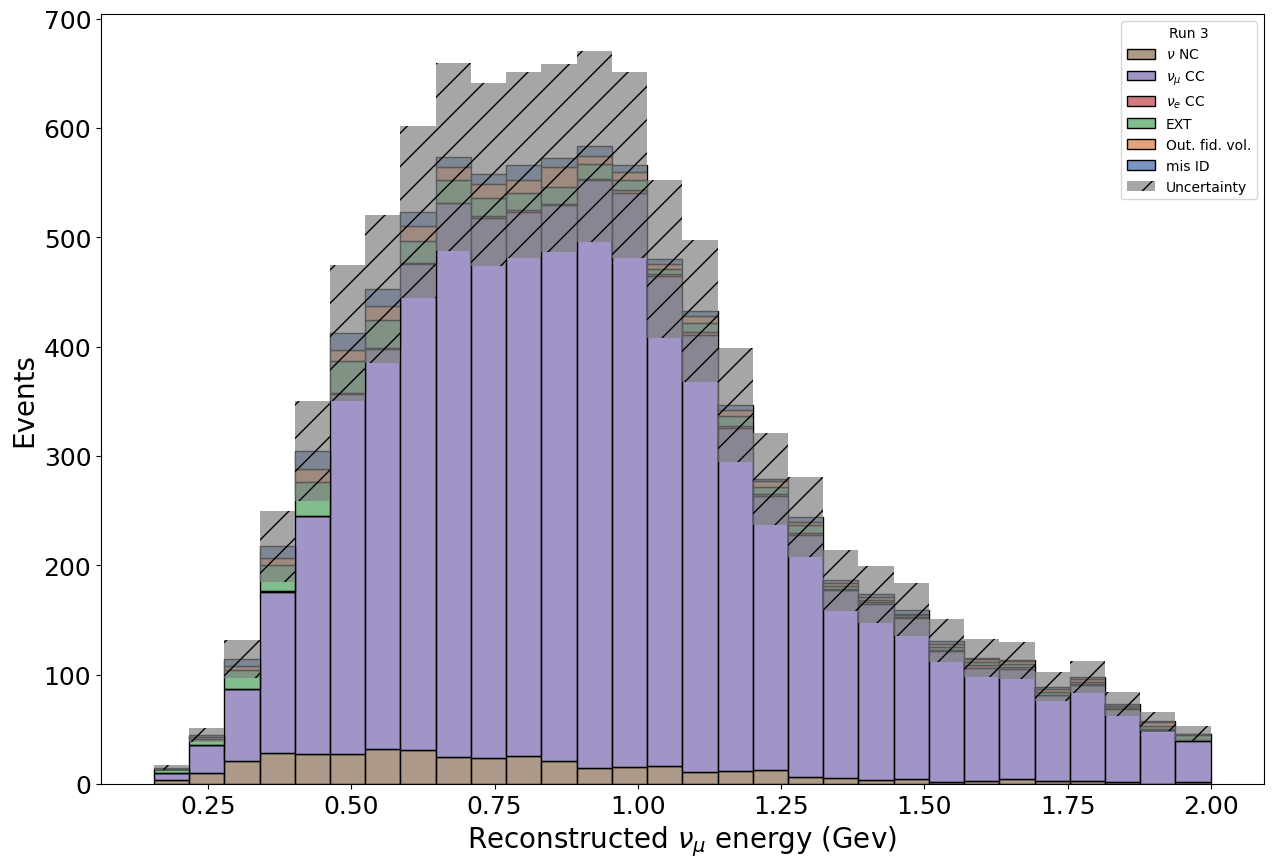

([np.float64(14.952626842515954),
  np.float64(44.88280876332152),
  np.float64(114.31784525778315),
  np.float64(217.54592663472596),
  np.float64(304.58675695479775),
  np.float64(412.61445997799524),
  np.float64(452.663088023515),
  np.float64(523.5280779364791),
  np.float64(573.6412118539471),
  np.float64(557.8560373749783),
  np.float64(566.0498561896086),
  np.float64(572.9127795770827),
  np.float64(583.1459841512144),
  np.float64(565.9924942351429),
  np.float64(480.2560552701052),
  np.float64(432.5250686112178),
  np.float64(346.97974013549174),
  np.float64(279.2058720502862),
  np.float64(244.2344579411559),
  np.float64(186.49621950386444),
  np.float64(173.84522518550764),
  np.float64(159.63471121840257),
  np.float64(131.20392322703287),
  np.float64(115.20022088504132),
  np.float64(113.0544156290232),
  np.float64(89.11315655731472),
  np.float64(97.55606478467601),
  np.float64(73.60769199769234),
  np.float64(57.434256443036574),
  np.float64(46.18630841831781)]

In [31]:
Neutrino_functions.histogram_plot(MC_frame = oscillated_data,
                                  variable='trk_energy_tot',
                                  bins=30, name='Muon disappearance probability',
                                  scaling=oscillated_data['weight'] * probabilities,
                                  xlims=[min(oscillated_data['trk_energy_tot']), max(oscillated_data['trk_energy_tot'])],
                                  plot_data=False)

In [32]:
# Function that oscillates and calculates chi squared for set delM21 and sin^2(2theta)

def chi_from_params(test_data, data_heights, dm21, sin2theta, reduced=False):
    E_vals = [E for E in test_data['true_E']]
    L = 0.47
    probabilities = 1 - P_oscillation(None, dm21, L, E_vals, sin2theta=sin2theta)

    MC_heights, _ = np.histogram(test_data['trk_energy_tot'], bins=23, weights=np.array(test_data['weight']) * probabilities)
    
    chi = chi2(MC_heights, data_heights, MC_heights * 0.15, reduced=reduced)
    if dm21<0  or sin2theta<0 or sin2theta>1:
        return 1e8
    return chi

In [33]:
# Function that loops the above function across range of values of delM21 and sin^2(2theta)
sin2theta_range = np.linspace(0.1, 1, 10)
dm21_range = np.linspace(0.0001, 50, 10)
chi_list = []
for sin2theta in sin2theta_range:
    for dm21 in dm21_range:
        chi_list.append({'sin2theta': sin2theta, 'dm21': dm21, 'chi': chi_from_params(MC_EXT_CUT, oscillated_data_heights, dm21, sin2theta)})
print(chi_list[np.argmin([x['chi'] for x in chi_list])])

{'sin2theta': np.float64(0.6), 'dm21': np.float64(11.111188888888888), 'chi': np.float64(1.1103700748988785)}


In [34]:
# plot contourf function and find minimum!
def find_min_chi(test_data, data_heights, constants):
    '''
    Function that finds the constants that give a minimum value of chi squared.

    Parameters
    ----------
    data : array
        The data points that chi is being calculated against.
    fit_func : function
        The function that chi squared is being calculated with respect to.
    constants : array
        The parameters of the function that are used as starting values.

    Returns
    -------
    minimum : array
        An array of the value for constants at the minimum value of chi.

    '''
    import scipy.optimize as opt
    def chi_temp(a):
        return chi_from_params(test_data, data_heights, a[1], a[0])
    minimum = opt.fmin(chi_temp, constants, disp=True, maxiter=100)
    return minimum

osc_min_chi_vals = find_min_chi(MC_EXT_CUT, oscillated_data_heights, [0.5, 12])
print(osc_min_chi_vals)
osc_min_chi = chi_from_params(MC_EXT_CUT, oscillated_data_heights, osc_min_chi_vals[1], osc_min_chi_vals[0])
print(osc_min_chi)
red_osc_min_chi = chi_from_params(MC_EXT_CUT, oscillated_data_heights, osc_min_chi_vals[1], osc_min_chi_vals[0], reduced=False)
print(red_osc_min_chi)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 32
         Function evaluations: 61
[ 0.55599752 11.11998525]
4.702659728405445e-09
4.702659728405445e-09


In [65]:
def plot_chi(data, data_heights, constants, chi_min, chi_plot, sigma_err=True, log_axes=False, sterile_approx = False,
             override_lims = None, return_contours = False, X_SCALE = 0.3, Y_SCALE = 0.3, RESOLUTION = 100, X_OFFSET = 0, Y_OFFSET = 0):
    '''
    Plots chi squared as a function of the two decay constants. It plots chi
    as a colour gradient, where a darker colour indicates a lower value. It
    also plots contour lines for the minimum value of chi + 1, 2.3, 5.99 and
    9.21 which show 1, 2, 3 and 4 standard deviations of the constants respectively.

    Parameters
    ----------
    data : array
        The data that chi is being calculated for.
    constants : array
        An array that contains the constants that describe the best fit function.
    chi_min : float
        Value of the minimum value for chi squared.
    chi_plot : AxesSubplot
        An empty subplot to have chi plotted to.

    Returns
    -------
    chi_plot : AxesSubplot
        The completed subplot.
    color_plot : QuadContourSet
        The coloured contour plot, needed to create a colour bar.
    uncertainties : list
        The uncertainties on the two parameters.

    '''
    if override_lims == None:
        x_mesh, y_mesh = np.meshgrid(
            np.linspace((1-X_SCALE)*constants[0]+X_OFFSET,
                        (1+X_SCALE)*constants[0]+X_OFFSET, RESOLUTION),
            np.linspace((1-Y_SCALE)*constants[1]+Y_OFFSET,
                        (1+Y_SCALE)*constants[1]+Y_OFFSET, RESOLUTION)
        )
    else:
        x_mesh, y_mesh = np.meshgrid(override_lims[0], override_lims[1])

    if sigma_err:
        chi_levels = [chi_min+2.3, chi_min+6.18, chi_min+11.83]
    else:
        chi_levels = [chi_min+4.61, chi_min+5.99, chi_min+9.21]
    def chi_temp(a):
        return chi_from_params(data, data_heights, a[1], a[0])
    chi_mesh = np.apply_along_axis(chi_temp, 0, [x_mesh, y_mesh])
    if sterile_approx:
        x_mesh = (1-np.sqrt(1-x_mesh))*(1-np.sqrt(1-0.24))
    if log_axes:
        locator=ticker.LogLocator(subs = (1.58, 2.51, 3.98, 6.31))
        color_plot = chi_plot.contourf(
            x_mesh, y_mesh, chi_mesh, levels=30, locator=locator, cmap='Blues_r')
        contour_plot = chi_plot.contour(x_mesh, y_mesh, chi_mesh, levels=chi_levels,
                                        cmap='gray_r')
        plt.gca().set_xscale('log')
        plt.gca().set_yscale('log')
    else:
        color_plot = chi_plot.contourf(
            x_mesh, y_mesh, chi_mesh, 15, cmap='Blues_r')
        contour_plot = chi_plot.contour(x_mesh, y_mesh, chi_mesh, levels=chi_levels,
                                        cmap='gray_r')
    if not sterile_approx:
        chi_plot.scatter(constants[0], constants[1], color='k', marker='x',
                     label=r'Minimised $\chi^2$')
        chi_plot.clabel(contour_plot, fontsize=7, colors='white',
                        fmt={chi_levels[0]: r'$\chi_{{min}}^2$ + {0:.3}'.format(chi_levels[0]-chi_min),
                            chi_levels[1]: r'$\chi_{{min}}^2$ + {0:.3}'.format(chi_levels[1]-chi_min),
                            chi_levels[2]: r'$\chi_{{min}}^2$ + {0:.3}'.format(chi_levels[2]-chi_min)
                            })
    inner_ring = contour_plot.collections[0].get_paths()[0]
    coor_inner = inner_ring.vertices
    x_max = max(coor_inner[:, 0])
    y_max = max(coor_inner[:, 1])
    x_min = min(coor_inner[:, 0])
    y_min = min(coor_inner[:, 1])
    chi_plot.set_title(
        '$\u03C7^2$ whilst varying $\u0394m_{21}^2$ and $sin^2(2\u03B8)$')
    chi_plot.set_xlabel('$sin^2(2\u03B8)$')
    chi_plot.set_ylabel('$\u0394m_{21}^2$')
    chi_plot.tick_params(axis='x', labelsize=7)
    if not sterile_approx:
        chi_plot.axhline(y_max, linestyle='--', color='k', alpha=0.5)
        chi_plot.axvline(x_max, linestyle='--', color='k', alpha=0.5)
        chi_plot.axhline(y_min, linestyle='--', color='k', alpha=0.5)
        chi_plot.axvline(x_min, linestyle='--', color='k', alpha=0.5)
        chi_plot.legend(loc='lower left', fontsize=7)
    else:
        chi_plot.set_title(
            '$\u03C7^2$ whilst varying $\u0394m_{14}^2$ and $sin^2(2\u03B8_{\mu e})$')
        chi_plot.set_xlabel('$sin^2(2\u03B8_{\mu e})=sin^2(\u03B8_{24})sin^2(2\u03B8_{14})$')
        chi_plot.set_ylabel('$\u0394m_{14}^2$')
    if not sterile_approx:
        uncertainties =  {'x': (x_max-x_min)/2, 'y': (y_max-y_min)/2}
        plt.text(0.95, 0.95,
                f"Errors\n$sin^2(2\u03B8)$: {'{0:.3}'.format(uncertainties['y'])}\n$\u0394m_{{21}}^2$: {'{0:.3}'.format(uncertainties['x'])}",
                size=7.5,
            ha="right", va="top",
            transform=chi_plot.transAxes,
            bbox=dict(boxstyle="square",
                    ec='k',
                    fc='w',
                    )
            )
    if return_contours:
        contours = {0.9: contour_plot.collections[0].get_paths()[0].vertices,
                    0.95: contour_plot.collections[1].get_paths()[0].vertices,
                    0.99: contour_plot.collections[2].get_paths()[0].vertices,
                    }
        return chi_plot, color_plot, contours
    return chi_plot, color_plot, uncertainties

C:\Users\fredr\AppData\Local\Temp\ipykernel_264012\557736931.py:69: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  inner_ring = contour_plot.collections[0].get_paths()[0]


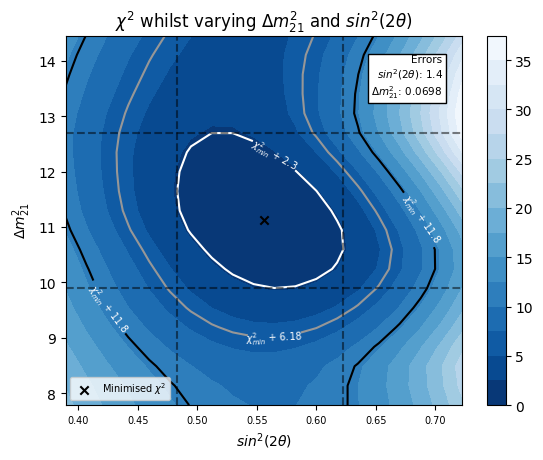

In [36]:
fig = plt.figure()
ax = fig.subplots()
ax, cp, uncertainties = plot_chi(MC_EXT_CUT, oscillated_data_heights, osc_min_chi_vals, osc_min_chi, ax, RESOLUTION=20)
fig.colorbar(cp)
plt.show()

del oscillated_data

Apply your above defined functions, and represent your result with matplotlib's contour and fcontour.

In [37]:
# oscillate MC wrt to true data
min_chi_vals = find_min_chi(MC_EXT_CUT, data_frame_heights, [0.02, 5])
print(min_chi_vals)
min_chi = chi_from_params(MC_EXT_CUT, data_frame_heights, min_chi_vals[1], min_chi_vals[0])
print("Chi squared: " + str(min_chi))
min_red_chi = chi_from_params(MC_EXT_CUT, data_frame_heights, min_chi_vals[1], min_chi_vals[0], reduced=True)
print('Reduced Chi squared: ' + str(min_red_chi))

Optimization terminated successfully.
         Current function value: 21.201396
         Iterations: 33
         Function evaluations: 65
[0.02869691 4.34997442]
Chi squared: 21.201396200859733
Reduced Chi squared: 0.9217998348199884


C:\Users\fredr\AppData\Local\Temp\ipykernel_264012\557736931.py:69: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  inner_ring = contour_plot.collections[0].get_paths()[0]


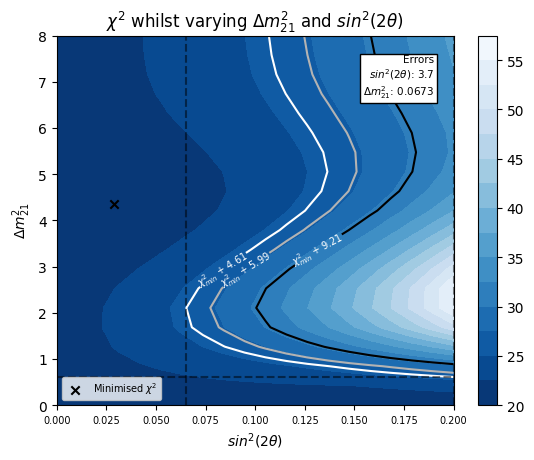

In [38]:
# contourf application
fig = plt.figure()
ax = fig.subplots()
ax, cp, uncertainties = plot_chi(MC_EXT_CUT, data_frame_heights, min_chi_vals, min_chi, ax, sigma_err=False, override_lims=[np.linspace(0, 0.2, 20), np.linspace(0, 8, 20)])
fig.colorbar(cp)
plt.show()

KeyboardInterrupt: 

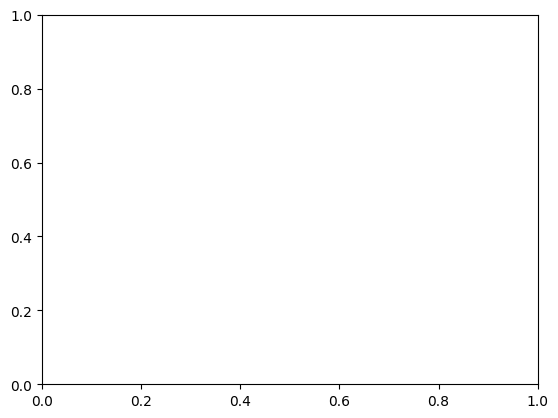

In [47]:
# contourf application
fig = plt.figure()
ax = fig.subplots()
ax, cp, uncertainties = plot_chi(MC_EXT_CUT, data_frame_heights, min_chi_vals, min_chi, ax, sigma_err=False, log_axes=True, override_lims=[np.logspace(-1.7, 0, 100), np.logspace(-1, 1.5, 100)])
fig.colorbar(cp)
plt.show()

In [40]:
# import sys

# for name, var in globals().items():
#     # print(name)
#     print(f'{name}: {sys.getsizeof(var)}')

### Bonus: Minimise

Minimise your chi square value, determining the parameters of 'best fit'

### Confidence levels and parameter minima. 
Determine confidence levels, and find the parameter values that correspond to the lowest chi squared value within your range.with

In [41]:
# contour application, with correct confidence levels.

In [42]:
# find lowest chi squared value within range and plot with CL, or contourf plot.

# Exercise 13/14: 3+1 Framework Neutrino disappearance.

C:\Users\fredr\AppData\Local\Temp\ipykernel_264012\8043154.py:70: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  inner_ring = contour_plot.collections[0].get_paths()[0]
C:\Users\fredr\AppData\Local\Temp\ipykernel_264012\8043154.py:105: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  contours = {0.9: contour_plot.collections[0].get_paths()[0].vertices,
C:\Users\fredr\AppData\Local\Temp\ipykernel_264012\8043154.py:106: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  0.95: contour_plot.collections[1].get_paths()[0].vertices,
C:\Users\fredr\AppData\Local\Temp\ipykernel_264012\8043154.py:107: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  0.99: contour_plot.collections[2].get_paths()[0].vertices,


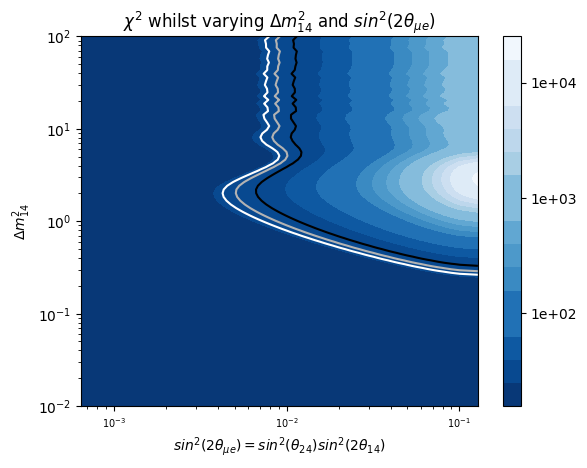

In [67]:
# Produce your new oscillation parameter, which should be sin^2(2*theta_ue)
# contourf application
fig = plt.figure()
ax = fig.subplots()
ax, cp, contours = plot_chi(MC_EXT_CUT, data_frame_heights, min_chi_vals, min_chi, ax,
                            return_contours=True, sigma_err=False, sterile_approx=True, log_axes=True,
                            override_lims=[np.logspace(-2, 0, 100), np.logspace(-2, 2, 100)])
fig.colorbar(cp, format='%.e', ticks=ticker.LogLocator(base=10))
plt.show()

In [68]:
# print(contours)

# Compare your result with MiniBooNE

Results are extracted from MiniBooNE (orange) and LSND (blue)

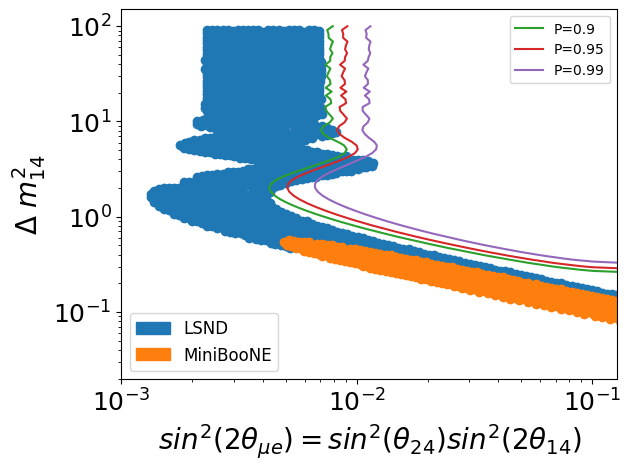

In [69]:
# Load data
LSND_data = pd.read_csv('./data/DataSet_LSND.csv').to_numpy()
MiniBooNE_data = pd.read_csv('./data/DataSet_MiniBooNE.csv').to_numpy()

# Plot data
plt.xlim(left=0.001, right=0.128)
plt.plot(LSND_data[:,0],LSND_data[:,1],'o')
plt.plot(MiniBooNE_data[:,0],MiniBooNE_data[:,1],'o')

# Producing MiniBooNE/LSND legend
LSND_path = mpatches.Patch(color='tab:blue', label = 'LSND')
MINI_path = mpatches.Patch(color='tab:orange', label = 'MiniBooNE')
first_legend = plt.legend(handles=[LSND_path, MINI_path], loc = 'lower left', fontsize = 12)
plt.gca().add_artist(first_legend)

for name, vals in contours.items():
    plt.plot(vals[:,0], vals[:,1], label=f'P={name}')

plt.legend()
plt.xlabel(r'$sin^2(2\theta_{\mu e})=sin^2(\theta_{24})sin^2(2\theta_{14})$',fontsize=20)
plt.ylabel(r'$\Delta$ $m_{14}^2$',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.show()